In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import t

In [2]:
data = {'Categoria': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        'Ventas': [100, 110, 90, 80, 85, 75, 120, 115, 125]}
df = pd.DataFrame(data)

means = df.groupby('Categoria')['Ventas'].mean()
stds = df.groupby('Categoria')['Ventas'].std()
n = df.groupby('Categoria')['Ventas'].count()
conf_level = 0.95
t_crit = t.ppf((1 + conf_level) / 2, np.sum(n) - len(means))

lower = means - t_crit * stds / np.sqrt(n)
upper = means + t_crit * stds / np.sqrt(n)

ci_df = pd.DataFrame({'Categoria': means.index,
                      'Media': means.values,
                      'Desviacion Estandar': stds.values,
                      'Tamano Muestra': n.values,
                      'Limite Inferior': lower.values,
                      'Limite Superior': upper.values})
ci_df

,Categoria,Media,Desviacion Estandar,Tamano Muestra,Limite Inferior,Limite Superior
0,A,100.0,10.0,3,85.872748,114.127252
1,B,80.0,5.0,3,72.936374,87.063626
2,C,120.0,5.0,3,112.936374,127.063626


C:\Users\Oscar\AppData\Local\Temp\ipykernel_14916\1652800171.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(means.index)


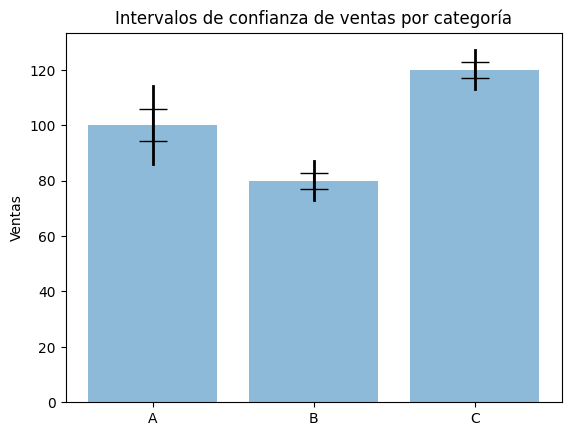

In [3]:
fig, ax = plt.subplots()

# Graficar las barras de las medias
ax.bar(means.index, means.values, yerr=stds / np.sqrt(n), capsize=10, alpha=0.5, ecolor='black')

# Graficar las líneas de los intervalos de confianza
for i in range(len(means)):
    ax.plot([i, i], [lower[i], upper[i]], 'k-', lw=2)

# Agregar etiquetas y títulos
ax.set_xticklabels(means.index)
ax.set_ylabel('Ventas')
ax.set_title('Intervalos de confianza de ventas por categoría')
plt.show()

In [4]:
fig = px.box(df, y="Ventas", color='Categoria')
fig.show()

In [5]:
fig = px.violin(df, y="Ventas", color='Categoria')
fig.show()

In [6]:
print('Ok_')

Ok_
